# Introduction
This file is used to evaluate the parameter estimation techniques used in order to get a better understanding of them

In [38]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

# Random Forest

This section tackles the random forest parameter estimation techniques.

## Run from 2023_09_19-2233

In [39]:
with open("./training_results/RF/2023_09_19-2233/settings.json") as f:
    parameters = json.load(f)
data_info = parameters.get("data_info")
param_info = parameters.get("param_info")
result_info = parameters.get("result_info")
parameters

{'data_info': {'data_folder': './processed_files/B',
  'X_train shape': [278508, 27],
  'y_train shape': [278508, 1],
  'X_test shape': [69628, 27],
  'y_test shape': [69628, 1]},
 'param_info': {'base_clf': 'RandomForestClassifier(random_state=42)',
  'param_grid': {'max_depth': [1, 2, 3, None],
   'max_features': ['sqrt', 0.3, 0.6, 0.9, 1.0],
   'min_samples_split': [2, 0.1, 0.2, 0.3],
   'bootstrap': [True, False],
   'criterion': ['gini', 'entropy']},
  'search_method': {'method_type': "<class 'sklearn.model_selection._search_successive_halving.HalvingGridSearchCV'>",
   'method_params': {'aggressive_elimination': 'False',
    'cv': '5',
    'error_score': 'nan',
    'estimator__bootstrap': 'True',
    'estimator__ccp_alpha': '0.0',
    'estimator__class_weight': 'None',
    'estimator__criterion': 'gini',
    'estimator__max_depth': 'None',
    'estimator__max_features': 'sqrt',
    'estimator__max_leaf_nodes': 'None',
    'estimator__max_samples': 'None',
    'estimator__min_impu

In [40]:
cv_results_df = pd.read_pickle("./training_results/RF/2023_09_19-2233/cv_results.pkl")
cv_results_df

,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0,25,3.268019,0.628831,0.146520,0.022911,True,gini,1,sqrt,...,0.568515,0.000163,624,0.568566,0.568584,0.568571,0.568514,0.568236,0.568494,0.000131
1,0,25,3.596971,0.065407,0.164168,0.010159,True,gini,1,sqrt,...,0.568515,0.000163,624,0.568566,0.568584,0.568571,0.568514,0.568236,0.568494,0.000131
2,0,25,3.591286,0.045852,0.169490,0.009621,True,gini,1,sqrt,...,0.568515,0.000163,624,0.568566,0.568584,0.568571,0.568514,0.568236,0.568494,0.000131
3,0,25,3.412892,0.492327,0.160859,0.027222,True,gini,1,sqrt,...,0.568515,0.000163,624,0.568566,0.568584,0.568571,0.568514,0.568236,0.568494,0.000131
4,0,25,4.525591,0.434440,0.160179,0.004205,True,gini,1,0.3,...,0.599889,0.000893,604,0.600105,0.600410,0.599970,0.600475,0.598783,0.599949,0.000612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,6,1600,2102.266856,38.316471,31.041376,1.036879,True,gini,None,0.6,...,0.722331,0.001810,15,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018
631,6,1600,1051.812164,193.404170,42.641747,3.039016,True,entropy,None,sqrt,...,0.723168,0.001888,11,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018
632,6,1600,889.481612,138.457710,42.776802,1.920223,True,gini,None,sqrt,...,0.723933,0.001892,7,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018
633,6,1600,1439.446581,120.836643,49.205706,23.066490,True,gini,None,0.3,...,0.724737,0.001703,1,0.999843,0.999803,0.999829,0.999829,0.999856,0.999832,0.000018


In [185]:
test = cv_results_df[['n_resources','param_max_depth', 'mean_test_score']].groupby(by=["n_resources", "param_max_depth"], group_keys = False, dropna = False).mean()
test = test.reset_index()
test = test.set_index("n_resources")
test

,param_max_depth,mean_test_score
n_resources,,
25,1.0,0.621352
25,2.0,0.649521
25,3.0,0.659134
25,NaN,0.675932
50,1.0,0.651385
50,2.0,0.651386
50,3.0,0.665680
50,NaN,0.683394
100,3.0,0.672519


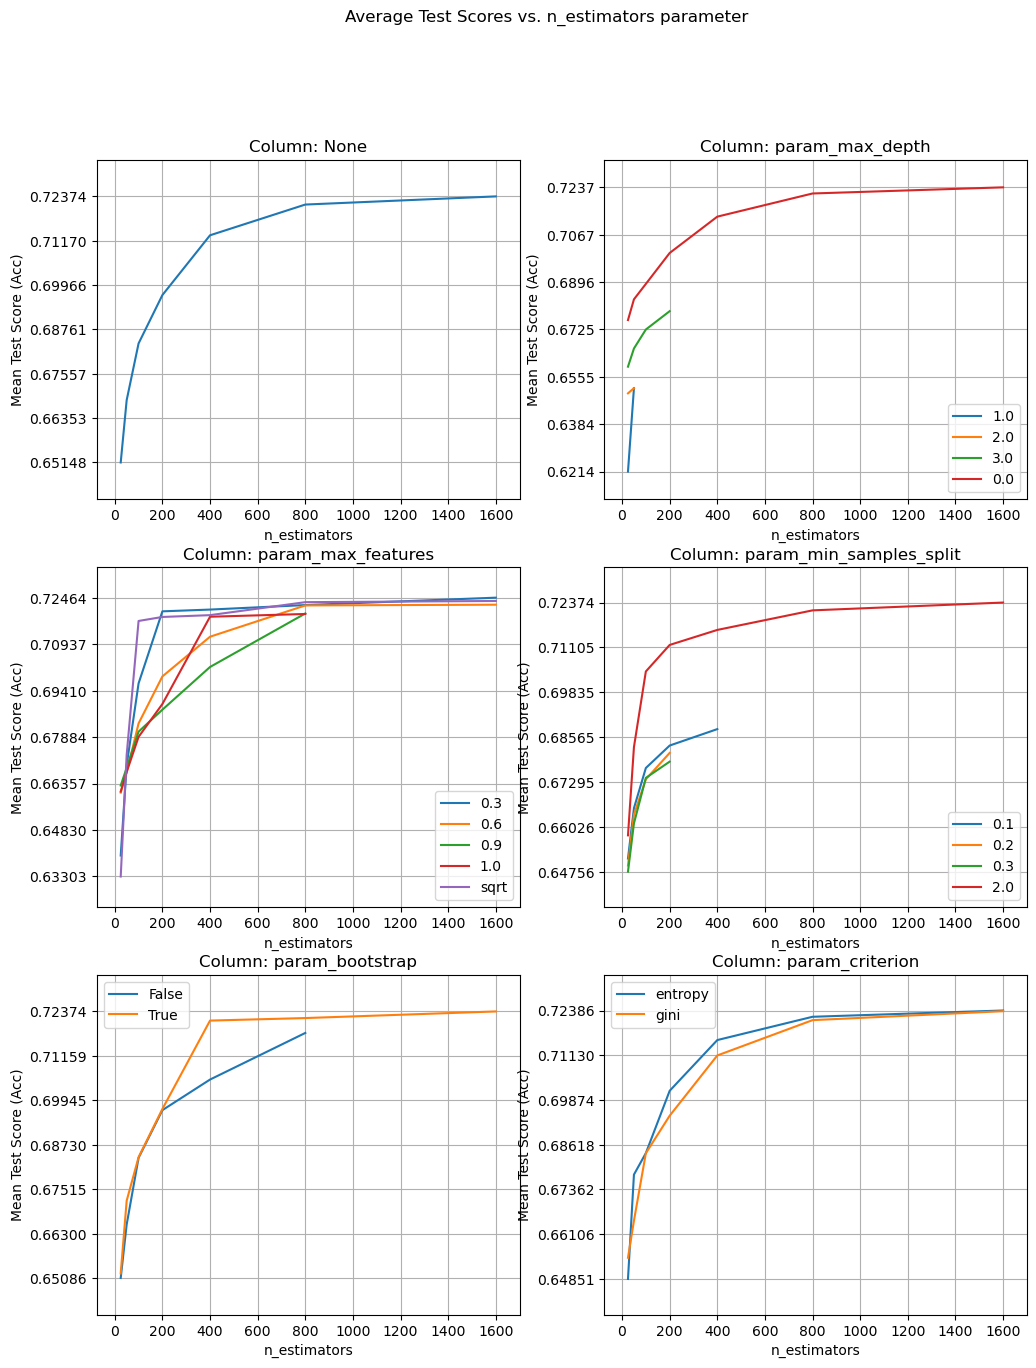

In [205]:
def make_plot(df, X_label, Y_label,ax, C_label = None):
    if C_label:
        C = df[C_label]
        for item in list(C.unique()):
            X = df[df[C_label] == item][X_label]
            Y = df[df[C_label] == item][Y_label]
            ax.plot(X, Y, label = str(item))
        ax.legend()
    else:
        X = df[X_label]
        Y = df[Y_label]
        ax.plot(X, Y)
    ax.set_xlabel("n_estimators")
    ax.set_ylabel("Mean Test Score (Acc)")
    ax.set_title(f"Column: {C_label}")
    ax.set_xlim([df[X_label].min() - 100,df[X_label].max() + 100])
    ax.set_ylim([df[Y_label].min() - 0.01, df[Y_label].max() + 0.01])
    ax.set_yticks(np.linspace(df[Y_label].min(), df[Y_label].max(), 7))
    ax.grid()

grid_param_cols = ["param_" + s for s in list(param_info.get("param_grid").keys())]
n_cols = 2
n_rows =(len(grid_param_cols) + 1) / n_cols
fig, axs = plt.subplots(nrows=int(n_rows), ncols=int(n_cols), figsize=(12,15))
fig.suptitle("Average Test Scores vs. n_estimators parameter")
data = cv_results_df[["n_resources", "mean_test_score"]].groupby(by=["n_resources"]).mean()
data = data.reset_index()
make_plot(df = data, X_label="n_resources", Y_label="mean_test_score", ax=axs[0][0])
for c, col in enumerate(grid_param_cols):
    c = c + 1
    param_data = cv_results_df[['n_resources',col, 'mean_test_score']].groupby(by=["n_resources", col], dropna=False).mean()
    param_data = param_data.reset_index()
    if col == "param_max_depth":
        param_data = param_data.fillna(0)
    make_plot(df = param_data, X_label = "n_resources", Y_label = "mean_test_score", ax=axs[int(c/2)][c%2], C_label=col)

plt.show()